## Code for [A No-Go guide for the Hubble ](tensionhttps://arxiv.org/abs/2107.13286)
The Author: Rong-Gen Cai, Zong-Kuan Guo, Shao-Jiang Wang, Wang-Wei Yu, Yong Zhou

In [1]:
import emcee
import matplotlib.pyplot as plt
import numpy as np
import corner
from IPython.display import display, Math

- pbc03: Page Approximation with BC03 data.
- pms11: Page Approximation with MS11 data.
- lbc03: LCDM with BC03 data.
- lms11: LCDM with MS11 data.

In [2]:
readerh1 = emcee.backends.HDFBackend("./chains/pbc03.h5")
readerh2 = emcee.backends.HDFBackend("./chains/lbc03.h5")
readerh3 = emcee.backends.HDFBackend("./chains/pms11.h5")
readerh4 = emcee.backends.HDFBackend("./chains/lms11.h5")

In [3]:
flat_samplesh1 = readerh1.get_chain(discard=1000, thin=1, flat=True)
flat_samplesh2 = readerh2.get_chain(discard=1000, thin=1, flat=True)
flat_samplesh3 = readerh3.get_chain(discard=1000, thin=1, flat=True)
flat_samplesh4 = readerh4.get_chain(discard=1000, thin=1, flat=True)
ndimp = 5
ndiml = 4

# Parameter Estimate

In [4]:
print('Page Approximation with BC03 data.')
labels=["p","\eta", "H_0", "M_B","r_d"]
for i in range(ndimp):
    mcmc = np.percentile(flat_samplesh1[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
print('the lnlikelihood', max(readerh1.get_log_prob(flat=True)))
print('Page Approximation with MS11 data.')
labels=["p","\eta", "H_0", "M_B","r_d"]
for i in range(ndimp):
    mcmc = np.percentile(flat_samplesh3[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
print('the lnlikelihood', max(readerh3.get_log_prob(flat=True)))
print('LCDM with BC03 data.')
labels=["\Omega_m","H_0", "M_B", "r_d"]
for i in range(ndiml):
    mcmc = np.percentile(flat_samplesh2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
print('the lnlikelihood', max(readerh2.get_log_prob(flat=True)))
print('LCDM with MS11 data.')
labels=["\Omega_m","H_0", "M_B", "r_d"]
for i in range(ndiml):
    mcmc = np.percentile(flat_samplesh4[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
print('the lnlikelihood', max(readerh4.get_log_prob(flat=True)))

Page Approximation with BC03 data.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

the lnlikelihood -537.8229164452471
Page Approximation with MS11 data.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

the lnlikelihood -534.4790921207791
LCDM with BC03 data.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

the lnlikelihood -539.181409780584
LCDM with MS11 data.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

the lnlikelihood -535.7257961715343


# Fig 
## Fig. 4

Quantiles:
[(0.16, 0.2765125902352067), (0.5, 0.33352957529414906), (0.84, 0.40098088810023735)]
Quantiles:
[(0.16, 0.9647005703789095), (0.5, 0.9753848937512386), (0.84, 0.9870753012050931)]
Quantiles:
[(0.16, 0.27816243099048243), (0.5, 0.3413221080119098), (0.84, 0.4006411264058784)]
Quantiles:
[(0.16, 0.9687582587766713), (0.5, 0.978079753987647), (0.84, 0.9880911282273943)]


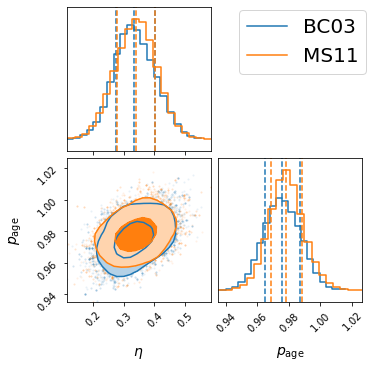

In [5]:
fig = corner.corner(
    data=flat_samplesh1[:,[1,0]], labels=["$\eta$","$p_\mathrm{age}$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,color="C0",
    weights=np.ones(len(flat_samplesh1))/len(flat_samplesh1),
    label_kwargs ={'fontsize':'14'},
)
axes = np.array(fig.axes).reshape((2, 2))
ax = axes[1,0]
ax.plot(-1,-1,color='C0',markersize=0,label="BC03")
ax.plot(-1,-1,color='C1',markersize=0,label="MS11")
ax.legend(bbox_to_anchor=(2.15,2.1),prop={'size':20})
corner.corner(
    data=flat_samplesh3[:,[1,0]], labels=["$\eta$","$p_\mathrm{age}$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,fig=fig,color="C1",
    weights=np.ones(len(flat_samplesh3))/len(flat_samplesh3),
    label_kwargs ={'fontsize':'14'},
);
fig.savefig("PAge.pdf")

## Fig 2(a)

Quantiles:
[(0.16, 67.13186650939926), (0.5, 68.9580230515598), (0.84, 70.73731125137218)]
Quantiles:
[(0.16, -19.43156271043511), (0.5, -19.379111299806365), (0.84, -19.32801987400375)]
Quantiles:
[(0.16, 143.16408387006285), (0.5, 146.46592832981588), (0.84, 149.91369634958002)]
Quantiles:
[(0.16, 67.91517558156191), (0.5, 69.38910060347129), (0.84, 70.93617549892367)]
Quantiles:
[(0.16, -19.421404735179213), (0.5, -19.374003941683455), (0.84, -19.32654334621328)]
Quantiles:
[(0.16, 143.66935267730213), (0.5, 146.56318702461027), (0.84, 149.85571816137727)]


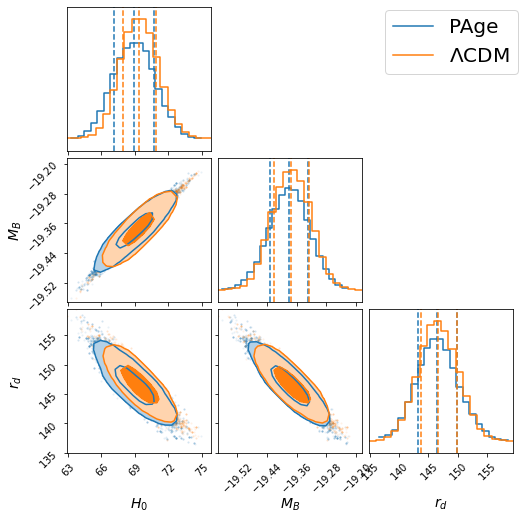

In [6]:
fig = corner.corner(
    data=flat_samplesh1[:,[2,3,4]], labels=["$H_0$", "$M_B$","$r_d$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,color="C0",
    weights=np.ones(len(flat_samplesh1))/len(flat_samplesh1),
    label_kwargs ={'fontsize':'14'},
)
axes = np.array(fig.axes).reshape((3, 3))
ax = axes[1,0]
ax.plot(1,1,color='C0',markersize=0,label="PAge")
ax.plot(1,1,color='C1',markersize=0,label="$\Lambda$CDM")
ax.legend(bbox_to_anchor=(3.2,2.1),prop={'size':20})
corner.corner(
    data=flat_samplesh2[:,[1,2,3]], labels=["$H_0$", "$M_B$","$r_d$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,fig=fig,color="C1",
    weights=np.ones(len(flat_samplesh2))/len(flat_samplesh2),
    label_kwargs ={'fontsize':'14'},
);
fig.savefig("BC03.pdf")

## Fig 2(b)

Quantiles:
[(0.16, 68.68167176936159), (0.5, 70.79945909017289), (0.84, 73.01926700366053)]
Quantiles:
[(0.16, -19.385650537661835), (0.5, -19.322312681026236), (0.84, -19.25906037135815)]
Quantiles:
[(0.16, 138.82304326622827), (0.5, 142.88479207126247), (0.84, 147.17194532655787)]
Quantiles:
[(0.16, 69.81135250056933), (0.5, 71.59131321916202), (0.84, 73.54158201188436)]
Quantiles:
[(0.16, -19.362268220545097), (0.5, -19.30898426022048), (0.84, -19.250421615442537)]
Quantiles:
[(0.16, 138.75315745772127), (0.5, 142.5734971969994), (0.84, 146.3278608176197)]


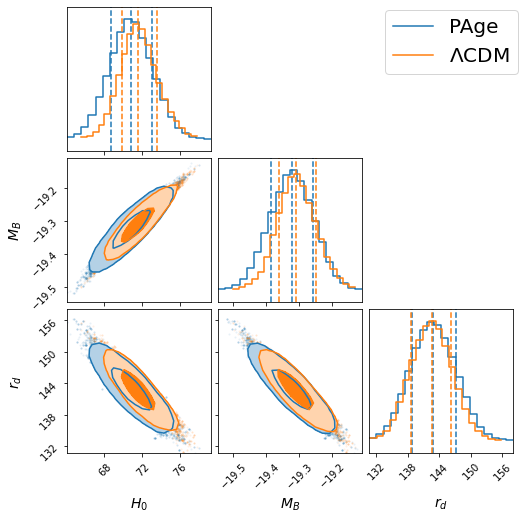

In [7]:
fig = corner.corner(
    data=flat_samplesh3[:,[2,3,4]], labels=["$H_0$", "$M_B$","$r_d$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,color="C0",
    weights=np.ones(len(flat_samplesh3))/len(flat_samplesh3),
    label_kwargs ={'fontsize':'14'},
)
axes = np.array(fig.axes).reshape((3, 3))
ax = axes[1,0]
ax.plot(1,1,color='C0',markersize=0,label="PAge")
ax.plot(1,1,color='C1',markersize=0,label="$\Lambda$CDM")
ax.legend(bbox_to_anchor=(3.2,2.1),prop={'size':20})
corner.corner(
    data=flat_samplesh4[:,[1,2,3]], labels=["$H_0$", "$M_B$","$r_d$"], 
    quantiles=[0.16,0.5,0.84],
    smooth = True,smooth1d=True,
    show_titles=False,verbose = True,levels=(0.393,0.865,),
    use_math_text = True,reverse = False,divergences = True,
    scale_hist = True,fill_contours = True,fig=fig,color="C1",
    weights=np.ones(len(flat_samplesh4))/len(flat_samplesh4),
    label_kwargs ={'fontsize':'14'},
);
fig.savefig("MS11.pdf")